In [1]:
# download the train dataset
import requests
import numpy as np
r = requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a''')

# load the train dataset
from sklearn.datasets import load_svmlight_file
from io import BytesIO

X_train,y_train = load_svmlight_file(f=BytesIO(r.content), n_features=123)#y读取了数据样本标签值，x读取了数据中的属性值
X_train=X_train.toarray()
y_train=y_train.reshape((-1,1))#从(32561,)变为（32561，1）即：从向量变为矩阵
train_sample_num,n_features=X_train.shape
X_train = np.column_stack((np.ones((train_sample_num, 1)),X_train))#添加一列全1，作为偏置列

In [2]:
#download the testing dataset
r_t=requests.get('https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t')
X_evl,y_evl=load_svmlight_file(f=BytesIO(r_t.content),n_features=123)
X_evl=X_evl.toarray()
y_evl=y_evl.reshape((-1,1))
evl_sample_num,n_features=X_evl.shape
X_evl = np.column_stack((np.ones((evl_sample_num, 1)),X_evl))#添加一列全1，作为偏置列
X_evl.shape

(16281, 124)

In [3]:
#initialize the w parameter
import random
# select different initializing method
# w = np.zeros((n_features+1, 1))  # initialize with zeros
w = np.random.random((n_features+1, 1))  # initialize with random numbers
# w = np.random.normal(1, 1, size=(n_features+1, 1))  # initialize with zero normal distribution

In [4]:
#define the superparameter
batch_size=120
epoch=500
learning_rate=0.0005
threshold=0.5

Lvalidation=[]

In [5]:
# #train使用随机选择的一批连续样本
# for i in range(epoch):
#     start=random.randint(0,train_sample_num-batch_size-1)
#     end=start+batch_size
#     X=X_train[start:end]#一批数量为120的连续样本
#     y=y_train[start:end]
#     add_grad=np.zeros((n_features+1,1))
#     for j in range(batch_size):
#         e=np.exp(-y[j]*np.dot(w.T,X[j].T))
#         temp=y[j]*X[j].T
#         temp=temp.reshape((-1,1))
#         add_grad += -(temp*e/(1+e))    
#     grad=-add_grad
#     grad=grad.reshape((-1,1))
#     w+=learning_rate*grad
    
#     add_loss=0
#     for k in range(batch_size):
#         X_t=X_test[k+120].reshape((-1,1))
#         y_t=y_test[k+120].reshape((-1,1))
#         add_loss+=np.log(1+np.exp(-y_t*np.dot(w.T,X_t)))
#     Lvalidation.append(add_loss[0][0]/batch_size)

In [6]:
#train使用随机抽取的一批非连续样本
for i in range(epoch):
    random_index=np.arange(X_train.shape[0])
    np.random.shuffle(random_index)
    add_grad=np.zeros((n_features+1,1))
    for j in range(batch_size):
        X=X_train[random_index[j]].reshape((-1,1))
        y=y_train[random_index[j]].reshape((-1,1))
        e=np.exp(-y*np.dot(w.T,X))
        temp=y*X
        temp=temp.reshape((-1,1))
        add_grad += -(temp*e/(1+e)) 
    grad=-add_grad.reshape((-1,1))
    w+=learning_rate*grad
    
    add_loss=0
    for k in range(batch_size):
        X_t=X_evl[k].reshape((-1,1))
        y_t=y_evl[k].reshape((-1,1))
        add_loss+=np.log(1+np.exp(-y_t*np.dot(w.T,X_t)))
    Lvalidation.append(add_loss[0][0]/batch_size)

In [54]:
#evaluation
random_index=np.arange(X_evl.shape[0])
np.random.shuffle(random_index)
hit=0
test_size=1200
for i in range(test_size):
    X=X_evl[random_index[i]].reshape((-1,1))
    y=y_evl[random_index[i]].reshape((-1,1))
    p=np.exp(np.dot(w.T,X))/(1+np.exp(np.dot(w.T,X)))
    if p[0][0]>=threshold and y[0][0]==1:
        hit+=1
    elif p[0][0]<threshold and y[0][0]==-1:
        hit+=1
print("准确率：{:.2f}%".format((hit/test_size)*100))

准确率：84.75%


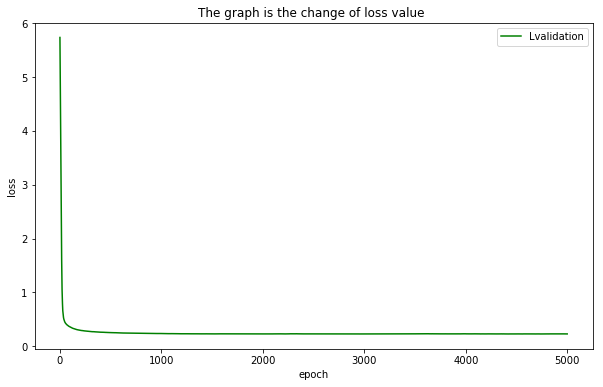

In [32]:
%matplotlib inline 
#只在notebook中才有用，意思是在直接python console里面生成图像

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(Lvalidation, "-", color="g", label="Lvalidation")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph is the change of loss value ")